In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df, Series as sr

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
boston_df = df(boston.data,columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [15]:
boston.target.shape

(506,)

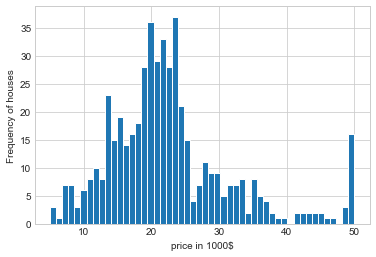

In [21]:
plt.hist(boston.target,bins=50,edgecolor='w')
plt.xlabel('price in 1000$')
plt.ylabel('Frequency of houses')

In [18]:
boston_df['Price']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


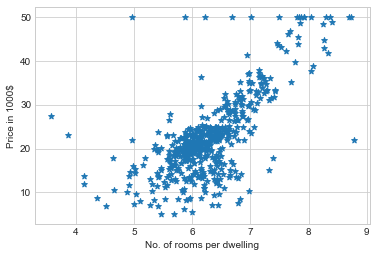

In [24]:
plt.scatter(boston_df['RM'],boston_df['Price'],marker='*')
plt.xlabel('No. of rooms per dwelling')
plt.ylabel('Price in 1000$')

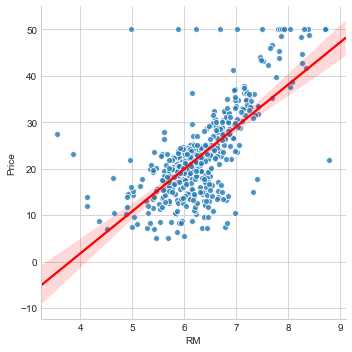

In [28]:
sns.lmplot('RM','Price',data=boston_df, line_kws = {'color':'r'},scatter_kws={'edgecolor':'w'})

In [29]:
##### -------------------PART 2- UNIVARIATE REGRESSION USING NUMPY --------------------#######

In [55]:
X = boston_df['RM']
Y = boston_df['Price']
X.shape ## X is 1 dimensional

(506,)

In [46]:
## convert X into 2-D as numpy takes 2D X
X =np.vstack(X)
X.shape

(506, 1)

In [ ]:
#y=mx+c
#y=Ap where A = [x 1] snd p = [[m],[c]]

In [51]:
A = [[value[0],1] for value in X]
A

[[6.5750000000000002, 1],
 [6.4210000000000003, 1],
 [7.1849999999999996, 1],
 [6.9980000000000002, 1],
 [7.1470000000000002, 1],
 [6.4299999999999997, 1],
 [6.0119999999999996, 1],
 [6.1719999999999997, 1],
 [5.6310000000000002, 1],
 [6.0039999999999996, 1],
 [6.3769999999999998, 1],
 [6.0090000000000003, 1],
 [5.8890000000000002, 1],
 [5.9489999999999998, 1],
 [6.0960000000000001, 1],
 [5.8339999999999996, 1],
 [5.9349999999999996, 1],
 [5.9900000000000002, 1],
 [5.4560000000000004, 1],
 [5.7270000000000003, 1],
 [5.5700000000000003, 1],
 [5.9649999999999999, 1],
 [6.1420000000000003, 1],
 [5.8129999999999997, 1],
 [5.9240000000000004, 1],
 [5.5990000000000002, 1],
 [5.8129999999999997, 1],
 [6.0469999999999997, 1],
 [6.4950000000000001, 1],
 [6.6740000000000004, 1],
 [5.7130000000000001, 1],
 [6.0720000000000001, 1],
 [5.9500000000000002, 1],
 [5.7009999999999996, 1],
 [6.0960000000000001, 1],
 [5.9329999999999998, 1],
 [5.8410000000000002, 1],
 [5.8499999999999996, 1],
 [5.96600000

In [53]:
# Create the X array in the form [X 1]
Z = np.array( [ [value,1] for value in X ] )
Z.shape

(506, 2)

In [58]:
m,c = np.linalg.lstsq(A,Y)[0]
m

9.1021089811803151

In [59]:
c

-34.670620776438575

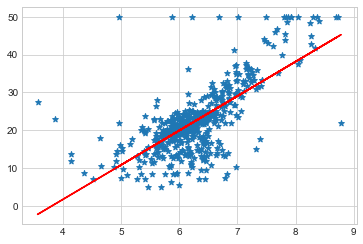

In [62]:
plt.scatter(boston_df['RM'],boston_df['Price'],marker = '*')

x = boston_df['RM'].values
plt.plot(x, m*x + c ,color = 'r')